# VolGAN-X — Exploratory Analysis

This notebook performs quick EDA on the sample options dataset and visualizes a toy implied volatility surface.

**Contents:**
1. Load dataset
2. Basic stats & sanity checks
3. 3D scatter of (T,K,IV)
4. (Optional) Quick generator forward pass on a grid


In [2]:
# 1) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# If running inside the repo clone, adjust this path accordingly.
DATA_PATH = '../data/spx_options_sample.csv'  # update to correct relative path if needed
print('Using data file:', DATA_PATH)

Using data file: ../data/spx_options_sample.csv


In [3]:
# 2) Load dataset
df = pd.read_csv(DATA_PATH)
df.head()

,maturity,strike,spot,implied_vol,call_price,put_price
0,0.0833,4800,4750,0.182,72.4,62.7
1,0.1666,4800,4750,0.176,90.1,82.5
2,0.2500,4800,4750,0.171,105.2,98.0
3,0.3333,4900,4750,0.185,65.8,54.6
4,0.4166,4900,4750,0.190,74.5,62.3


In [4]:
# 3) Basic stats
print('Rows:', len(df))
print(df.describe(include='all'))

Rows: 9
       maturity       strike    spot  implied_vol  call_price  put_price
count  9.000000     9.000000     9.0     9.000000    9.000000   9.000000
mean   0.472189  4977.777778  4750.0     0.199889   65.011111  56.311111
std    0.309015   185.592145     0.0     0.025717   23.526392  23.188437
min    0.083300  4800.000000  4750.0     0.171000   34.700000  28.000000
25%    0.250000  4800.000000  4750.0     0.182000   45.200000  37.900000
50%    0.416600  4900.000000  4750.0     0.190000   65.800000  54.600000
75%    0.666600  5100.000000  4750.0     0.218000   74.500000  62.700000
max    1.000000  5300.000000  4750.0     0.244000  105.200000  98.000000


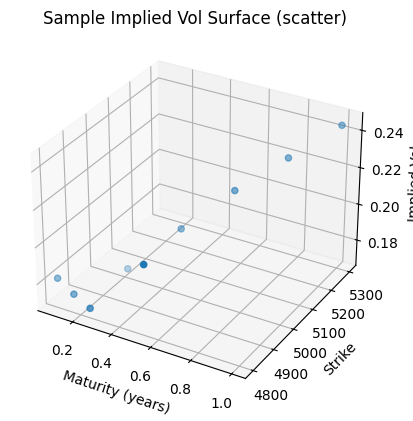

In [5]:
# 4) 3D scatter of (T, K, IV)
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['maturity'].values, df['strike'].values, df['implied_vol'].values, s=20)
ax.set_xlabel('Maturity (years)')
ax.set_ylabel('Strike')
ax.set_zlabel('Implied Vol')
ax.set_title('Sample Implied Vol Surface (scatter)')
plt.show()

## Optional: Quick Generator Grid (if repository code is available)
Ensure that your Python path includes the `src` directory. If running this notebook within the repo root, you can uncomment the next cell after adjusting `sys.path`.

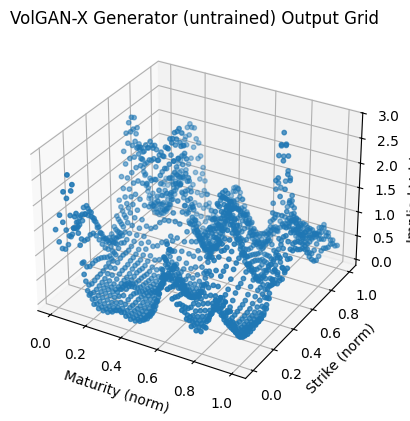

In [7]:
# 5) (Optional) Evaluate the generator on a normalized grid
# Uncomment and run only if you have the repo code in PYTHONPATH.
import sys, torch
sys.path.append('../src')  # <-- adjust path if needed
from generator import VolGenerator, VolGenConfig

G = VolGenerator(VolGenConfig(input_dim=2, fourier_features=16, hidden_dim=256, depth=5, bounded_head=True))
T = torch.linspace(0.0, 1.0, 40)
K = torch.linspace(0.0, 1.0, 40)
pts, vols = G.sample_grid(T, K)

# Plot generated surface
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pts.numpy()[:,0], pts.numpy()[:,1], vols.numpy().squeeze(), s=10)
ax.set_xlabel('Maturity (norm)')
ax.set_ylabel('Strike (norm)')
ax.set_zlabel('Implied Vol (gen)')
ax.set_title('VolGAN-X Generator (untrained) Output Grid')
plt.show()